# Basic exercise 2

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import linalg

This is a basic exercise in the course Python For Scientists. 
The aim is to get you acquainted with the syntax of `scipy` and `numpy` and give you the necessary skills to tackle more serious problems later on.

Of course these problems can be solved very easily by using AI tools. However, since the goal is to teach you the basics, it is not recommended to use AI. Try to solve them independetly instead.

## Linear least squares and the Van der Waals equation

The Van der Waals equation of state is a model of gases that describes a relation between pressure $P$, volume $V$ and temperature $T$. 
By taking into account the volume of the atoms or molecules in the gas and their interaction, it is an extension of the ideal gas law:

\begin{equation}
\left(P + a\frac{n}{V^2}\right)\left(V - bn\right) = nRT
\end{equation}

Here, $R = 0.083144$ L⋅bar⋅K$^{−1}$⋅mol$^{−1}$ is the gas constant, $a$ (expressed in L$^2$⋅bar/mol$^2$) is a constant that takes the interaction between the molecules into account and $b$ (expressed in L/mol) is the volume occupied by the molecules of one mole of gas. 

Imagine that we have one mole of an unknown gas trapped in a cavity of which the volume can be changed. The pressure in the cavity can be measured accurately by a pressure gauge and the temperature is kept constant at $273$ K. Measurements of the pressure (expressed in bar) were carried out while varying the volume (expressed in L), and the data was saved in a [data file](./VanderWaals.csv).


In [2]:
# Constants
n = 1  # mol
R = 0.083144  # L⋅bar⋅K^−1⋅mol^−1
T = 273  # K

### Part 1

Load the data from the data file into numpy arrays and plot the pressure $P$ as a function of the volume $V$.

Take a piece of paper and a pen and rewrite the  Van der Waals equation until it has a form that can be used in a fitting procedure. 
The variables that need to be fitted are $a$, $b$ and $a*b$. 
In order to be able to do **linear** least squares regression, we will regard $a*b$ as a third independent parameter $c$.

Write the code that performs the fit and print out the values of $a$ and $b$. 
Check if $c = a*b$. 
Have a look at [this Wikipedia page](https://en.wikipedia.org/wiki/Van_der_Waals_constants_(data_page)). 
Can you find out which gas we are dealing with here?

In [ ]:
# Implement your solution here

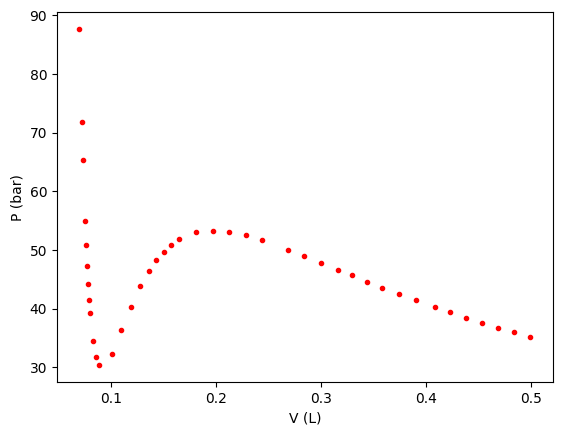

In [3]:
vdata, pdata = np.loadtxt("VanderWaals.csv", skiprows=5, unpack=True, delimiter=",")
plt.close()
plt.plot(vdata, pdata, "r.")
plt.xlabel("V (L)")
plt.ylabel("P (bar)")
plt.show()

\begin{equation}
a\frac{n}{V} - bnP - ab\frac{n^2}{V^2} = nRT - PV
\end{equation}

\begin{equation}
a\frac{1}{V} - bP - ab\frac{1}{V^2} = RT - PV
\end{equation}

In [4]:
A = (
    vdata[:, np.newaxis] ** [-1, 0, -2]
    * pdata[:, np.newaxis] ** [0, 1, 0]
    * [1, -1, -1]
)
y = R * T * np.ones(np.shape(A)[0]) - pdata * vdata
x, residues, rank, s = linalg.lstsq(A, y)
print(x)
a = x[0]
b = x[1]
print(f"a = {a} L^2bar/mol^2")
print(f"b = {b} L/mol")
print(f"c = {x[2]}, a*b = {a * b}")

[3.64      0.04267   0.1553188]
a = 3.6399999999999992 L^2bar/mol^2
b = 0.0426700000000001 L/mol
c = 0.15531880000000006, a*b = 0.1553188000000003


In [5]:
# The gas is CO2

### Part 2

Plot the data together with the pressure as function of the volume that originates from your fitted equation of state.

\begin{equation}
P = \frac{RT}{V-b} - \frac{a}{V^2}
\end{equation}

In [6]:
# Implement your solution here

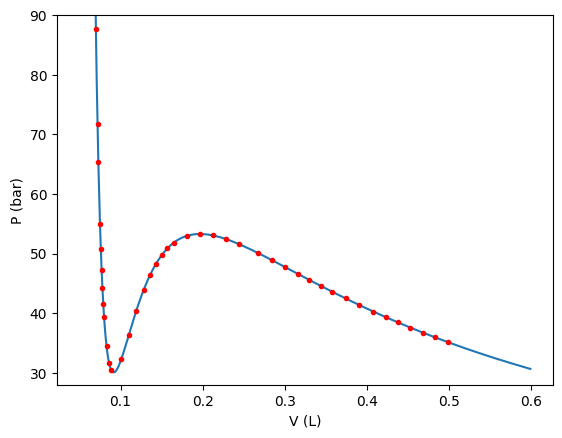

In [7]:
vrange = np.arange(0.05, 0.6, 0.001)

plt.close()
plt.plot(vrange, (R * T / (vrange - b)) - a / (vrange**2))
plt.plot(vdata, pdata, "r.")
plt.xlabel("V (L)")
plt.ylabel("P (bar)")
plt.ylim([28, 90])
plt.show()

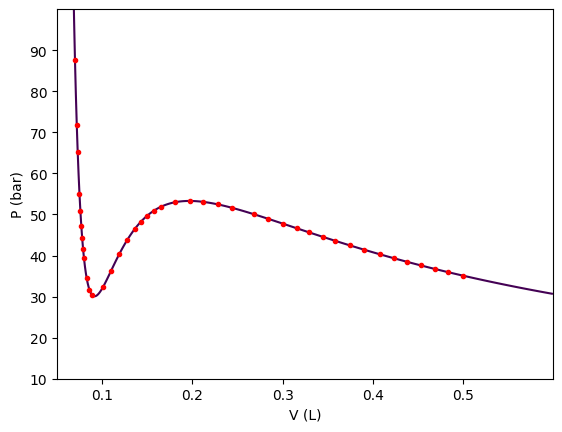

In [8]:
vrange = np.arange(0.05, 0.6, 0.001)
prange = np.arange(10, 100, 0.01)
v, p = np.meshgrid(vrange, prange)

FF = (p + a / v**2) * (v - b) - R * T
plt.close()
plt.contour(v, p, FF, [0])
plt.plot(vdata, pdata, "r.")
plt.xlabel("V (L)")
plt.ylabel("P (bar)")
plt.show()

### Part 3

Add some random noise to the data, both on the values of the pressure as on the values of the volume. 
This noise represents measurement errors that can occur in experiments. 
Use a Gaussian model for the noise with

- a mean of $0$ and a standard deviation of $1.0$ bar for the pressure
- a mean of $0$ and a standard deviation of $0.005$ L for the volume

Repeat this 5 times (use a loop) and perform a linear least squares fit every time. 
Print the values of $a$ and $b$ and plot all the fitted curves in one figure together with the original data. 

In [ ]:
# Implement your solution here

a = 3.690729213625191 L^2bar/mol^2
b = 0.04641144794103427 L/mol

a = 3.5492134413786727 L^2bar/mol^2
b = 0.04098857618277402 L/mol

a = 3.454028627785035 L^2bar/mol^2
b = 0.03389890654715255 L/mol

a = 3.607632545275816 L^2bar/mol^2
b = 0.04163457541544732 L/mol

a = 3.6776973874562704 L^2bar/mol^2
b = 0.04314702282194807 L/mol



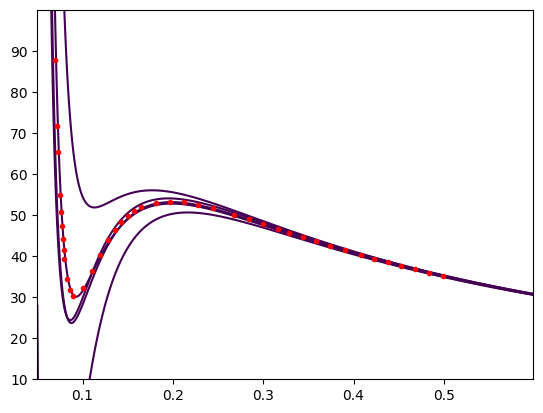

In [9]:
vrange = np.arange(0.05, 0.6, 0.001)
prange = np.arange(10, 100, 0.01)
v, p = np.meshgrid(vrange, prange)

plt.close()
for i in range(5):
    pdata_noise = pdata + np.random.normal(loc=0.0, scale=1.0, size=len(pdata))
    vdata_noise = vdata + np.random.normal(loc=0.0, scale=0.005, size=len(vdata))

    A = (
        vdata_noise[:, np.newaxis] ** [-1, 0, -2]
        * pdata_noise[:, np.newaxis]
        ** [
            0,
            1,
            0,
        ]
        * [1, -1, -1]
    )

    y = n * R * T * np.ones(np.shape(A)[0]) - vdata_noise * pdata_noise
    x, residues, rank, s = linalg.lstsq(A, y)
    a = x[0]
    b = x[1]
    print(f"a = {a} L^2bar/mol^2")
    print(f"b = {b} L/mol")
    print()

    FF = (p + a * n**2 / v**2) * (v - n * b) - n * R * T
    plt.contour(v, p, FF, [0])

plt.plot(vdata, pdata, "r.")
plt.show()

### Part 4
What do you notice about the fitted curves after the noise was added? 
Have a look at the condition number of the system and explain this behaviour.

If you would be able to alter the algorithm of linear least squares, can you think of a change that would make the fits of the noisy data better (i.e. $a$ and $b$ closer to their actual values)? 
Of course you don't have to implement this!


In [10]:
# Implement your solution here

In [11]:
print("Condition number:", s[0] / s[-1])

# The condition number of the system is relatively high, which means that the
# fitting problem is nearly rank-deficient. This means that the noise on the data
# can result in very different fits

# To make the fit better, we could introduce a penalty term to the Chi-squared caclulation
# that increases the squared error if c != a*b. In this way, the calculation is forced towards
# c = a*b, which is an extra condition on a and b that will make the fit better.
# This actually comes down to non-linear least squares fitting.

Condition number: 97.02826564722498
